In [ ]:
# Step 1: Import libraries
import pandas as pd


In [ ]:
# Step 2: Load datasets

# Load Ratings and Reviews dataset
rnr_df = pd.read_csv("/content/RnR_GB_DigData_prepared_filtered_IC.csv")

# Load Brandwatch dataset (social media sentiment)
brandwatch_df = pd.read_excel("brandwatch.xlsx")


In [ ]:
# Step 3: Preview the datasets
print("Ratings and Reviews Data")
print(rnr_df.head())

print("\nBrandwatch Data")
print(brandwatch_df.head())


Ratings and Reviews Data
       retailer                                   product_category  \
0  amazon.co.uk  Frozen > Ice Cream & Ice Lollies > Ice Cream N...   
1  amazon.co.uk  Frozen > Ice Cream & Ice Lollies > Ice Cream B...   
2  amazon.co.uk  Frozen > Ice Cream & Ice Lollies > Ice Cream B...   
3  amazon.co.uk  Frozen > Ice Cream & Ice Lollies > Ice Cream B...   
4  amazon.co.uk  Frozen > Ice Cream & Ice Lollies > Ice Cream B...   

  product_brand                                       product_name  \
0     Ari & Deb  1L Jersey Gold Ice Cream Mix | Summer | Barbec...   
1     MORRISONS  Morrisons Salted Caramel Ice Cream Cones, 4 x ...   
2     MORRISONS  Morrisons Salted Caramel Ice Cream Cones, 4 x ...   
3     MORRISONS  Morrisons Salted Caramel Ice Cream Cones, 4 x ...   
4     MORRISONS  Morrisons Salted Caramel Ice Cream Cones, 4 x ...   

   product_price         sku                             product_url  \
0           6.45  B095PRWB51  https://www.amazon.co.uk/dp/B09

In [ ]:
# Step 4: Compare brands by average rating and total reviews

# Group by product_brand
brand_summary = rnr_df.groupby('product_brand').agg(
    average_rating=('review_rating', 'mean'),
    total_reviews=('review_rating', 'count')
).reset_index()

# Sort the summary to see top-rated brands
brand_summary_sorted = brand_summary.sort_values(by='average_rating', ascending=False)

# Show the top 10 brands
print(brand_summary_sorted.head(10))

# Find where Ben & Jerry’s ranks
bj_rank = brand_summary_sorted[brand_summary_sorted['product_brand'].str.contains('ben & jerry', case=False)]
print("\nBen & Jerry’s Brand Summary:")
print(bj_rank)


           product_brand  average_rating  total_reviews
534              heffiso             5.0              1
530                  Yoo             5.0              2
1                    3 X             5.0              1
510  Waitrose & Partners             5.0              1
503    Viennetta Vanilla             5.0              1
22               BAILEYS             5.0              1
488            Toblerone             5.0              1
496              Umifica             5.0              1
487           The Ice Co             5.0              1
456            Smucker's             5.0              1

Ben & Jerry’s Brand Summary:
     product_brand  average_rating  total_reviews
24   BEN & JERRY'S        4.600478            418
34   Ben & Jerry's        4.350427           1287
35  Ben & Jerry\'s        3.800000              5


In [ ]:
# Step 5: Clean brand names (unify Ben & Jerry's spelling)

# Strip and lowercase brand names for consistency
rnr_df['product_brand_clean'] = rnr_df['product_brand'].str.lower().str.strip()

# Replace variations of Ben & Jerry's with one consistent label
rnr_df['product_brand_clean'] = rnr_df['product_brand_clean'].replace({
    "ben & jerry\'s": "ben & jerry's",
    "ben & jerry’s": "ben & jerry's"
})

# Group again by cleaned brand name
brand_summary_clean = rnr_df.groupby('product_brand_clean').agg(
    average_rating=('review_rating', 'mean'),
    total_reviews=('review_rating', 'count')
).reset_index()

# Sort the cleaned brand summary
brand_summary_clean_sorted = brand_summary_clean.sort_values(by='average_rating', ascending=False)

# Show top 10 brands after cleaning
print(brand_summary_clean_sorted.head(10))

# Find cleaned Ben & Jerry's
bj_clean = brand_summary_clean_sorted[brand_summary_clean_sorted['product_brand_clean'] == "ben & jerry's"]
print("\nCleaned Ben & Jerry’s Summary:")
print(bj_clean)


     product_brand_clean  average_rating  total_reviews
481                  yoo             5.0              2
460  waitrose & partners             5.0              1
457    viennetta vanilla             5.0              1
411        smooze simply             5.0              1
41            butterkist             5.0              4
441           the ice co             5.0              1
30                ben 10             5.0              1
449              umifica             5.0              1
73           cooldelight             5.0              2
68              claudi &             5.0              1

Cleaned Ben & Jerry’s Summary:
   product_brand_clean  average_rating  total_reviews
28       ben & jerry's         4.41173           1705


In [ ]:
# Step 6: Prepare date column

# Convert to datetime
rnr_df['review_timestamp'] = pd.to_datetime(rnr_df['review_timestamp'], errors='coerce')

# Extract Year-Month for trend analysis
rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M')


<ipython-input-6-1137c9e11794>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M')


In [ ]:
# Step 7: Aggregate reviews per month

monthly_reviews = rnr_df.groupby('year_month').agg(
    total_reviews=('review_rating', 'count'),
    average_rating=('review_rating', 'mean')
)

# Convert PeriodIndex to datetime for plotting
monthly_reviews.index = monthly_reviews.index.to_timestamp()

# Preview the time-indexed data
print(monthly_reviews.head())


            total_reviews  average_rating
year_month                               
2022-08-01           4445        4.177953
2022-09-01           3393        4.309166
2022-10-01           3387        4.339534
2022-11-01           1909        4.286014
2022-12-01           1222        4.317512


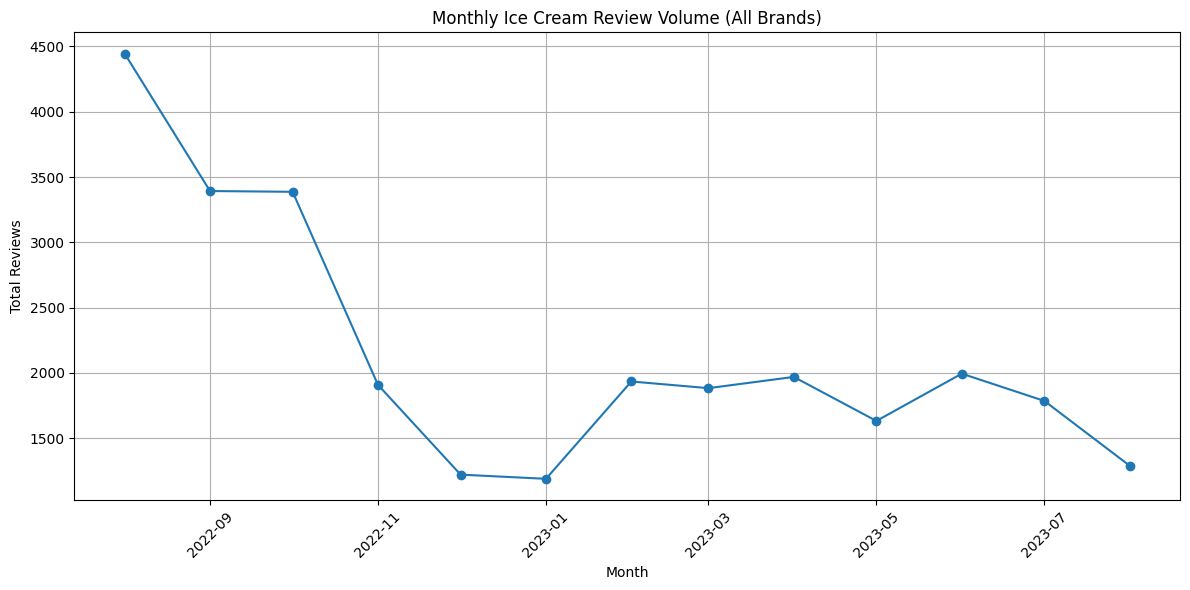

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Plot total reviews over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews.index, monthly_reviews['total_reviews'], marker='o', linestyle='-')
plt.title('Monthly Ice Cream Review Volume (All Brands)')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


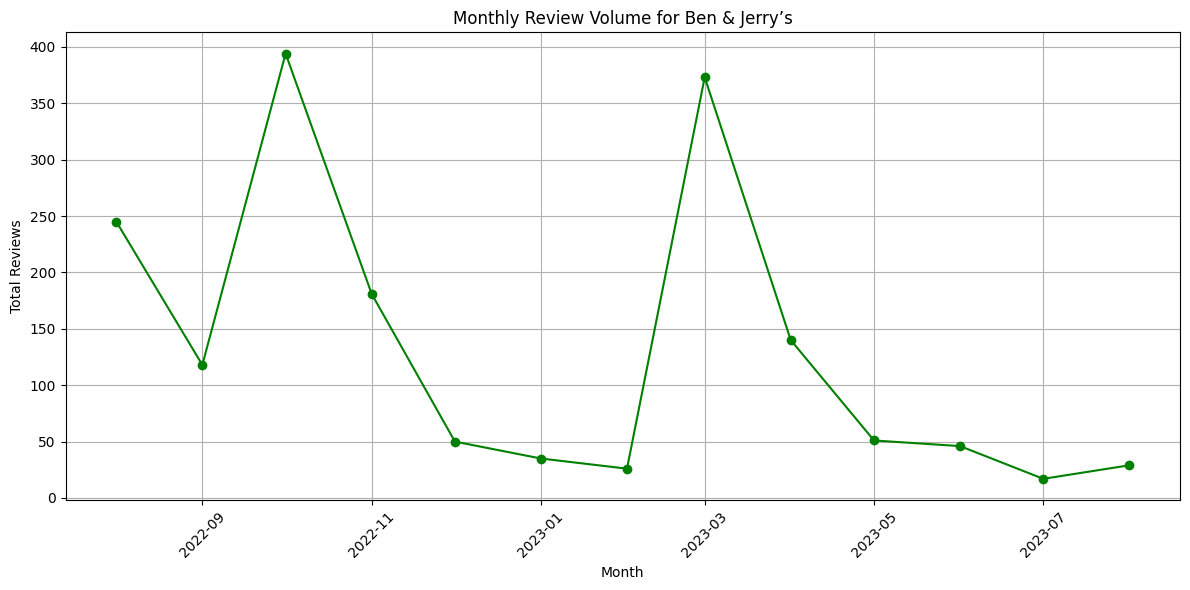

In [ ]:
# Step 9: Filter for Ben & Jerry’s only (using cleaned brand column)
bj_df = rnr_df[rnr_df['product_brand_clean'] == "ben & jerry's"]

# Group by month
bj_monthly = bj_df.groupby('year_month').agg(
    total_reviews=('review_rating', 'count'),
    average_rating=('review_rating', 'mean')
)

# Convert index for plotting
bj_monthly.index = bj_monthly.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(bj_monthly.index, bj_monthly['total_reviews'], marker='o', linestyle='-', color='green')
plt.title("Monthly Review Volume for Ben & Jerry’s")
plt.xlabel("Month")
plt.ylabel("Total Reviews")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Step 10: Clean Brandwatch dataset and filter for Ben & Jerry’s

# Drop rows where Full Text is missing
brandwatch_df_clean = brandwatch_df.dropna(subset=['Full Text'])

# Convert text to lowercase for easier filtering
brandwatch_df_clean['Full Text'] = brandwatch_df_clean['Full Text'].str.lower()

# Filter for posts mentioning Ben & Jerry’s
bj_social = brandwatch_df_clean[brandwatch_df_clean['Full Text'].str.contains("ben & jerry")]

# Count sentiment distribution
sentiment_counts = bj_social['Sentiment'].value_counts()

# Show the result
print("Sentiment Distribution for Ben & Jerry’s mentions:")
print(sentiment_counts)


Sentiment Distribution for Ben & Jerry’s mentions:
Sentiment
neutral     687
positive    293
negative    126
Name: count, dtype: int64


In [ ]:
# Step 11: Check for "vegan" mentions in Ben & Jerry’s posts

# Filter for posts that mention "vegan"
bj_vegan_mentions = bj_social[bj_social['Full Text'].str.contains("vegan")]

# Count how many contain vegan
vegan_count = bj_vegan_mentions.shape[0]

# Show result
print(f"Number of Ben & Jerry’s social posts mentioning 'vegan': {vegan_count}")


Number of Ben & Jerry’s social posts mentioning 'vegan': 775


In [ ]:
# Recreate the cleaned brand name column
rnr_df['product_brand_clean'] = rnr_df['product_brand'].str.lower().str.strip()
rnr_df['product_brand_clean'] = rnr_df['product_brand_clean'].replace({
    "ben & jerry\'s": "ben & jerry's",
    "ben & jerry’s": "ben & jerry's"
})


In [ ]:
# Recreate the cleaned brand column
rnr_df['product_brand_clean'] = rnr_df['product_brand'].str.lower().str.strip()
rnr_df['product_brand_clean'] = rnr_df['product_brand_clean'].replace({
    "ben & jerry\'s": "ben & jerry's",
    "ben & jerry’s": "ben & jerry's"
})

# Filter for Ben & Jerry’s only
bj_flavors_df = rnr_df[rnr_df['product_brand_clean'] == "ben & jerry's"]

# Group by flavor name to get average rating and total reviews
bj_flavor_summary = bj_flavors_df.groupby('product_name').agg(
    avg_rating=('review_rating', 'mean'),
    total_reviews=('review_rating', 'count')
).reset_index()

# Mark flavors as vegan or classic
bj_flavor_summary['type'] = bj_flavor_summary['product_name'].str.contains('non-dairy|vegan|dairy free', case=False).map({True: 'vegan', False: 'classic'})

# Filter to top-rated products with at least 5 reviews
bj_flavor_summary = bj_flavor_summary[bj_flavor_summary['total_reviews'] >= 5]
bj_flavor_summary = bj_flavor_summary.sort_values(by='avg_rating', ascending=False).head(10).reset_index(drop=True)

# View the result
bj_flavor_summary


,product_name,avg_rating,total_reviews,type
0,Ben & Jerry's Minter Wonderland Mint Ice Cream...,5.000000,11,classic
1,Ben & Jerry's Cookie Dough Ice Cream Tub,5.000000,6,classic
2,Ben & Jerry's Lighten Up Chocolate Cookie Doug...,4.965517,29,classic
3,Ben & Jerry's Light Choc Cookie,4.965517,29,classic
4,Ben & Jerry's Cookie & Brownie,4.961538,26,classic
5,Ben & Jerry's Chocolate Fudge Brownie Ice Crea...,4.961538,26,classic
6,Ben & Jerrys Cookies & Brownies Ice Cream 4X100ml,4.960000,25,classic
7,Ben & Jerry's Choc-Dough Cool-lection Ice Crea...,4.931034,29,classic
8,Ben & Jerry's Sundae Choco Lotto Cheesecake Ic...,4.896552,29,classic
9,Ben & Jerry's Dulce De-lish,4.866667,30,classic


In [ ]:
# Recreate cleaned brand column
rnr_df['product_brand_clean'] = rnr_df['product_brand'].str.lower().str.strip()
rnr_df['product_brand_clean'] = rnr_df['product_brand_clean'].replace({
    "ben & jerry\'s": "ben & jerry's",
    "ben & jerry’s": "ben & jerry's"
})

# Filter for Ben & Jerry’s
bj_flavors_df = rnr_df[rnr_df['product_brand_clean'] == "ben & jerry's"]

# Group for classic flavors
bj_flavor_summary = bj_flavors_df.groupby('product_name').agg(
    avg_rating=('review_rating', 'mean'),
    total_reviews=('review_rating', 'count')
).reset_index()
bj_flavor_summary['type'] = bj_flavor_summary['product_name'].str.contains('non-dairy|vegan|dairy free', case=False).map({True: 'vegan', False: 'classic'})

# Top 7 classic flavors (≥5 reviews)
top_classic = bj_flavor_summary[(bj_flavor_summary['type'] == 'classic') & (bj_flavor_summary['total_reviews'] >= 5)]
top_classic = top_classic.sort_values(by='avg_rating', ascending=False).head(7)

# Top 3 vegan flavors (even if < 5 reviews)
top_vegan = bj_flavor_summary[bj_flavor_summary['type'] == 'vegan'].sort_values(by='avg_rating', ascending=False).head(3)

# Combine both
lp_data = pd.concat([top_classic, top_vegan], ignore_index=True)

lp_data


,product_name,avg_rating,total_reviews,type
0,Ben & Jerry's Cookie Dough Ice Cream Tub,5.000000,6,classic
1,Ben & Jerry's Minter Wonderland Mint Ice Cream...,5.000000,11,classic
2,Ben & Jerry's Light Choc Cookie,4.965517,29,classic
3,Ben & Jerry's Lighten Up Chocolate Cookie Doug...,4.965517,29,classic
4,Ben & Jerry's Chocolate Fudge Brownie Ice Crea...,4.961538,26,classic
5,Ben & Jerry's Cookie & Brownie,4.961538,26,classic
6,Ben & Jerrys Cookies & Brownies Ice Cream 4X100ml,4.960000,25,classic
7,Ben & Jerry's Cookies On Cookie Dough Dairy Fr...,5.000000,1,vegan
8,Ben & Jerry's Cookies on Cookie Dough Ice Crea...,5.000000,3,vegan
9,Ben & Jerrys Dairy Free Salted Caramel Ice Cre...,5.000000,1,vegan


In [ ]:
# Rebuild cleaned brand column
rnr_df['product_brand_clean'] = rnr_df['product_brand'].str.lower().str.strip()
rnr_df['product_brand_clean'] = rnr_df['product_brand_clean'].replace({
    "ben & jerry\'s": "ben & jerry's",
    "ben & jerry’s": "ben & jerry's"
})

# Filter for Ben & Jerry’s
bj_flavors_df = rnr_df[rnr_df['product_brand_clean'] == "ben & jerry's"]

# Group for classic flavors
bj_flavor_summary = bj_flavors_df.groupby('product_name').agg(
    avg_rating=('review_rating', 'mean'),
    total_reviews=('review_rating', 'count')
).reset_index()
bj_flavor_summary['type'] = bj_flavor_summary['product_name'].str.contains('non-dairy|vegan|dairy free', case=False).map({True: 'vegan', False: 'classic'})

# Top 7 classic (≥5 reviews)
top_classic = bj_flavor_summary[(bj_flavor_summary['type'] == 'classic') & (bj_flavor_summary['total_reviews'] >= 5)]
top_classic = top_classic.sort_values(by='avg_rating', ascending=False).head(7)

# Top 3 vegan (any number of reviews)
top_vegan = bj_flavor_summary[bj_flavor_summary['type'] == 'vegan'].sort_values(by='avg_rating', ascending=False).head(3)

# Combine both
lp_data = pd.concat([top_classic, top_vegan], ignore_index=True)


In [ ]:
from scipy.optimize import linprog
import numpy as np

# Extract values from the prepared lp_data
ratings = lp_data['avg_rating'].values
types = lp_data['type'].values

# Objective: maximize total satisfaction => minimize negative ratings
c = -ratings

# Constraint 1: total units = 100
A_eq = [np.ones(len(ratings))]
b_eq = [100]

# Constraint 2: at least 30% vegan => sum(vegan_flavor_units) >= 30
A_ub = [-np.array([1 if t == 'vegan' else 0 for t in types])]
b_ub = [-30]

# Bounds: each flavor gets at least 5 units
bounds = [(5, None) for _ in ratings]

# Solve LP
res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Attach results
lp_data['optimal_units'] = res.x.round(2)

lp_data



,product_name,avg_rating,total_reviews,type,optimal_units
0,Ben & Jerry's Cookie Dough Ice Cream Tub,5.000000,6,classic,5.0
1,Ben & Jerry's Minter Wonderland Mint Ice Cream...,5.000000,11,classic,5.0
2,Ben & Jerry's Light Choc Cookie,4.965517,29,classic,5.0
3,Ben & Jerry's Lighten Up Chocolate Cookie Doug...,4.965517,29,classic,5.0
4,Ben & Jerry's Chocolate Fudge Brownie Ice Crea...,4.961538,26,classic,5.0
5,Ben & Jerry's Cookie & Brownie,4.961538,26,classic,5.0
6,Ben & Jerrys Cookies & Brownies Ice Cream 4X100ml,4.960000,25,classic,5.0
7,Ben & Jerry's Cookies On Cookie Dough Dairy Fr...,5.000000,1,vegan,55.0
8,Ben & Jerry's Cookies on Cookie Dough Ice Crea...,5.000000,3,vegan,5.0
9,Ben & Jerrys Dairy Free Salted Caramel Ice Cre...,5.000000,1,vegan,5.0


In [ ]:
# Convert the timestamp column to datetime (if not already)
rnr_df['review_timestamp'] = pd.to_datetime(rnr_df['review_timestamp'], errors='coerce')

# Create a year-month column for time series
rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M')


<ipython-input-18-2542520f5664>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M')


In [ ]:
# Ensure timestamp is datetime
rnr_df['review_timestamp'] = pd.to_datetime(rnr_df['review_timestamp'], errors='coerce')

# Create 'year_month' again
rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M')


<ipython-input-19-d979d42e035a>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M')


In [ ]:
# Convert review timestamp to datetime
rnr_df['review_timestamp'] = pd.to_datetime(rnr_df['review_timestamp'], errors='coerce')

# Create a new column with datetime version of year_month for time series
rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M').dt.to_timestamp()


<ipython-input-20-2bbda8dc089e>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M').dt.to_timestamp()


In [ ]:
# Step 1: Re-import and format date column properly
rnr_df['review_timestamp'] = pd.to_datetime(rnr_df['review_timestamp'], errors='coerce')

# Step 2: Create a datetime-based monthly column for grouping
rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M').dt.to_timestamp()

# Step 3: Verify it worked
print(rnr_df[['review_timestamp', 'year_month']].head())


           review_timestamp year_month
0 2022-11-13 00:00:00+00:00 2022-11-01
1 2022-08-09 00:00:00+00:00 2022-08-01
2 2022-08-14 00:00:00+00:00 2022-08-01
3 2022-08-27 00:00:00+00:00 2022-08-01
4 2022-09-13 00:00:00+00:00 2022-09-01


<ipython-input-21-ddc82d63e875>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  rnr_df['year_month'] = rnr_df['review_timestamp'].dt.to_period('M').dt.to_timestamp()


In [ ]:
print(rnr_df.columns)


Index(['retailer', 'product_category', 'product_brand', 'product_name',
       'product_price', 'sku', 'product_url', 'review_url', 'review_timestamp',
       'review_rating', 'review_title', 'review_body', 'market',
       'product_description', 'product_currency',
       'product_available_inventory', 'product_image_url', 'product_tags',
       'product_contents', 'product_rating', 'product_reviews_count', 'bsr',
       'product_brand_clean', 'year_month'],
      dtype='object')


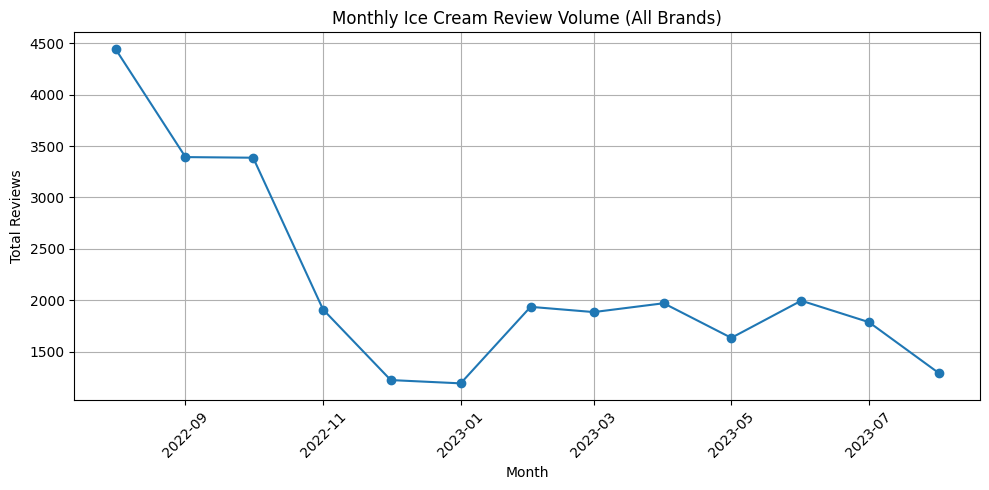

In [ ]:
monthly_reviews = rnr_df.groupby('year_month').agg(
    total_reviews=('review_rating', 'count'),
    average_rating=('review_rating', 'mean')
)

plt.figure(figsize=(10, 5))
plt.plot(monthly_reviews.index, monthly_reviews['total_reviews'], marker='o', linestyle='-')
plt.title('Monthly Ice Cream Review Volume (All Brands)')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


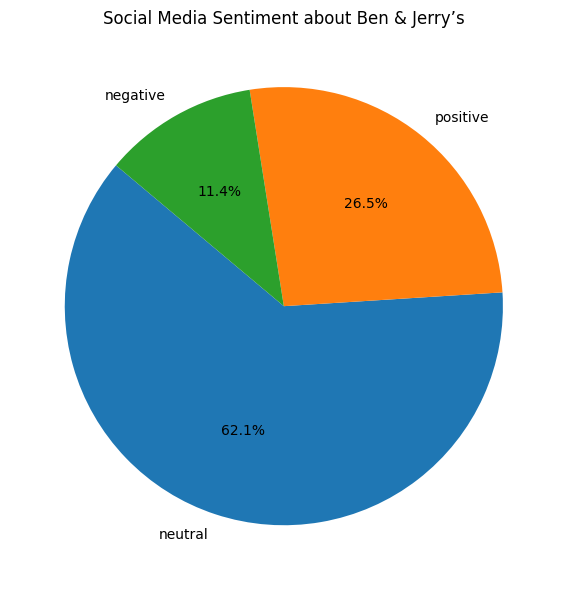

In [ ]:
sentiment_counts = bj_social['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Social Media Sentiment about Ben & Jerry’s")
plt.tight_layout()
plt.show()


<ipython-input-25-ba6e0162d655>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


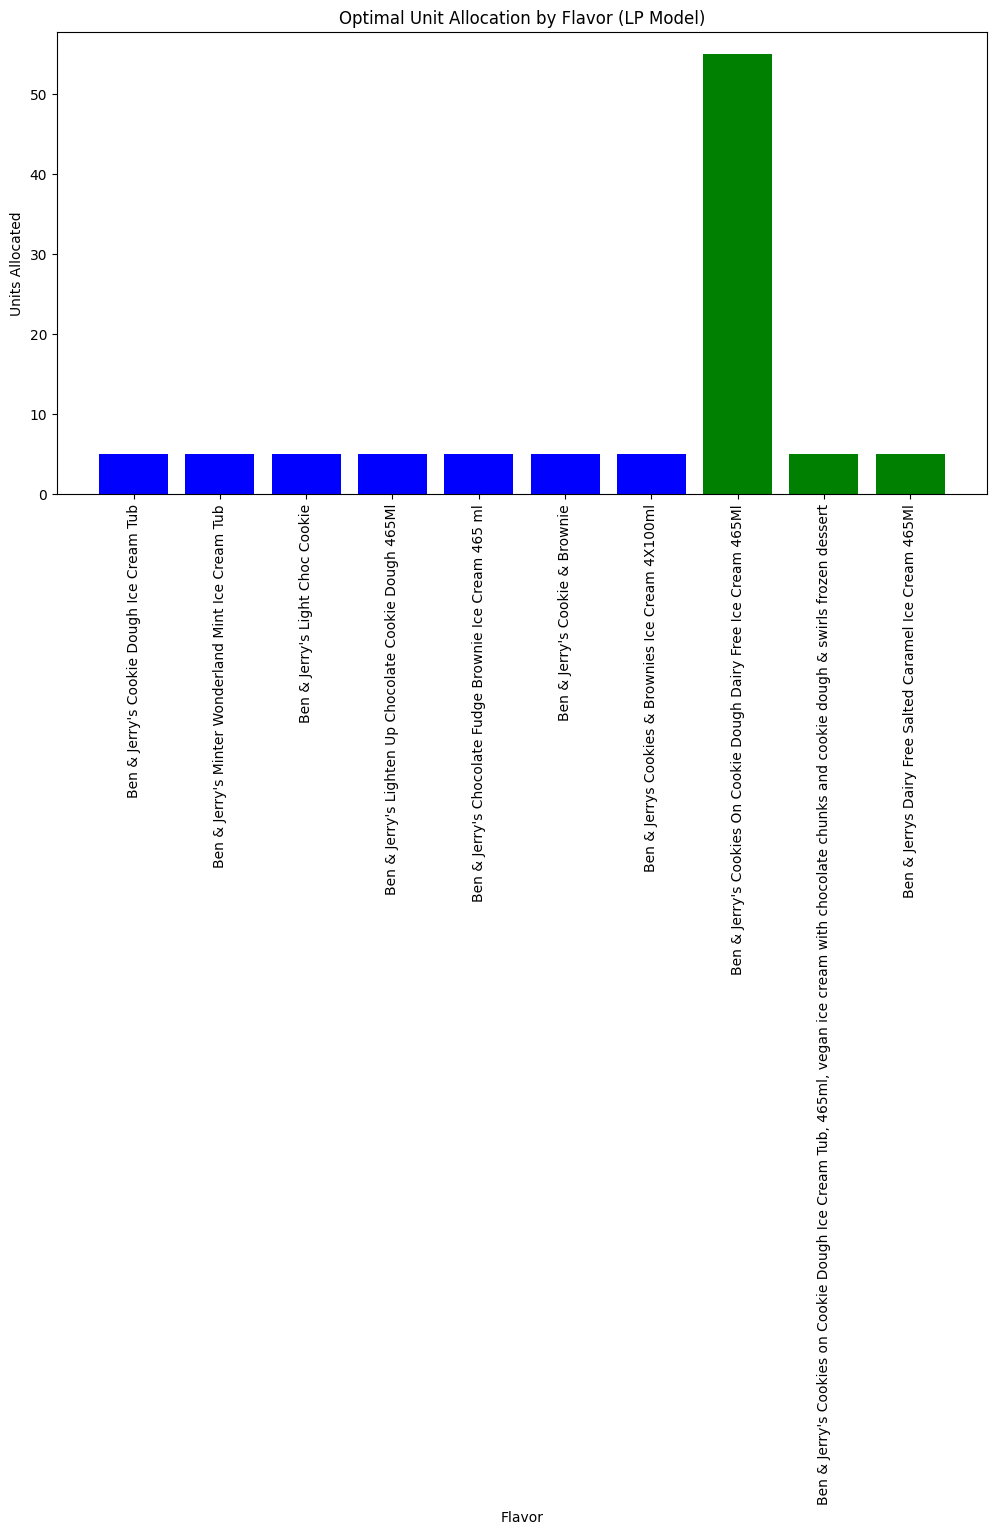

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(lp_data['product_name'], lp_data['optimal_units'],
        color=['green' if t == 'vegan' else 'blue' for t in lp_data['type']])
plt.title('Optimal Unit Allocation by Flavor (LP Model)')
plt.xlabel('Flavor')
plt.ylabel('Units Allocated')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/slide3_optimization_chart_shortnames.png'

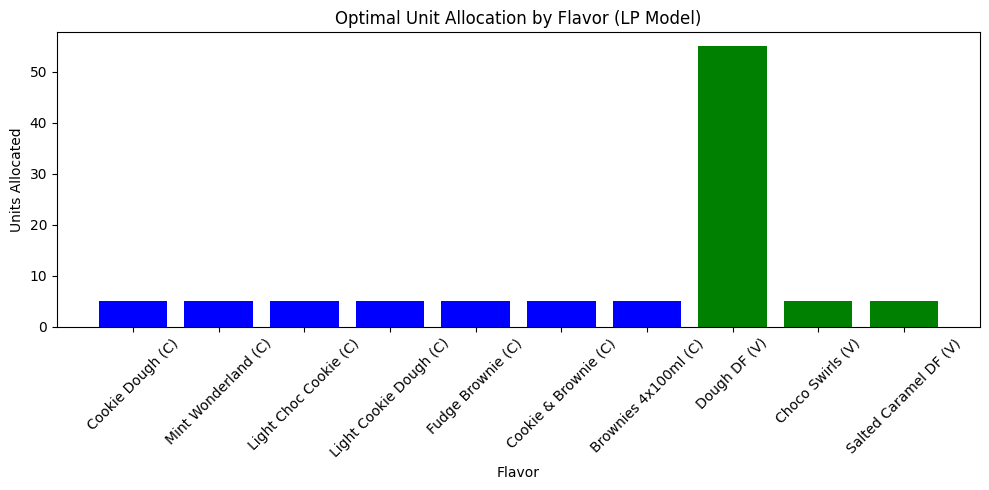

In [ ]:
# Create a shorter version of product names
short_names = [
    "Cookie Dough (C)", "Mint Wonderland (C)", "Light Choc Cookie (C)",
    "Light Cookie Dough (C)", "Fudge Brownie (C)", "Cookie & Brownie (C)",
    "Brownies 4x100ml (C)", "Dough DF (V)", "Choco Swirls (V)", "Salted Caramel DF (V)"
]

# Re-plot with shortened names
plt.figure(figsize=(10, 5))
plt.bar(short_names, lp_data['optimal_units'], color=['green' if t == 'vegan' else 'blue' for t in lp_data['type']])
plt.title('Optimal Unit Allocation by Flavor (LP Model)')
plt.xlabel('Flavor')
plt.ylabel('Units Allocated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/mnt/data/slide3_optimization_chart_shortnames.png")
plt.close()

"/mnt/data/slide3_optimization_chart_shortnames.png"


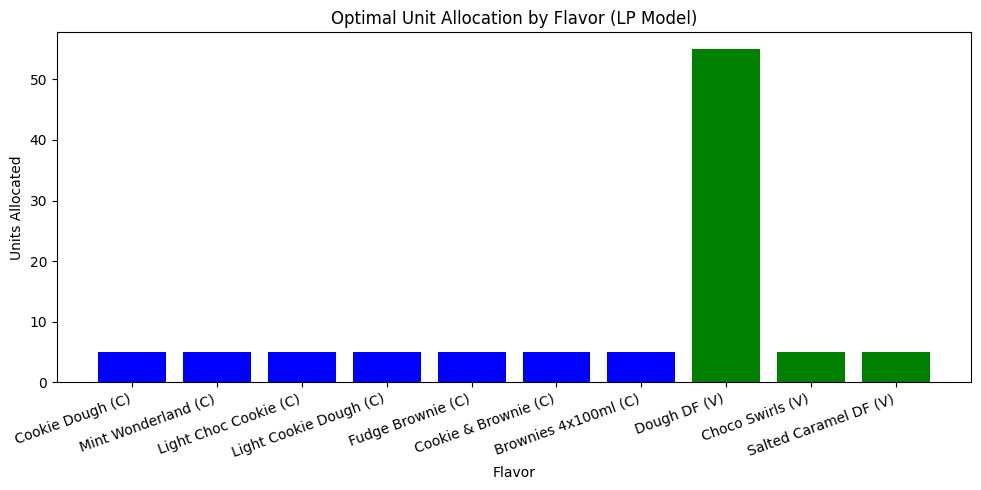

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(short_names, lp_data['optimal_units'],
        color=['green' if t == 'vegan' else 'blue' for t in lp_data['type']])

plt.title('Optimal Unit Allocation by Flavor (LP Model)')
plt.xlabel('Flavor')
plt.ylabel('Units Allocated')

# ✅ Angle labels slightly instead of 90 degrees
plt.xticks(rotation=20, ha='right')  # ha = horizontal alignment
plt.tight_layout()
plt.show()


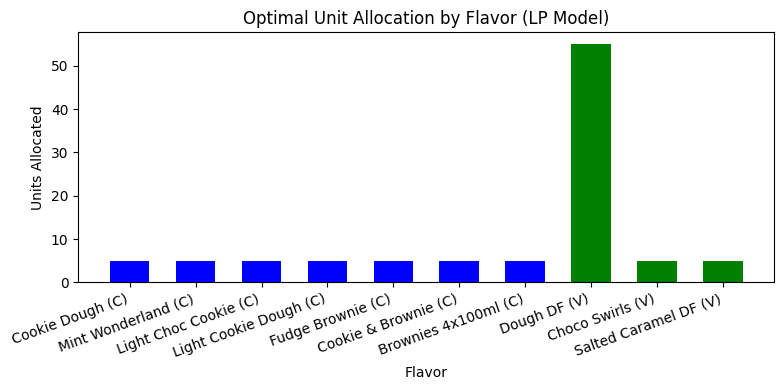

In [ ]:
plt.figure(figsize=(8, 4))  # Smaller width brings bars closer
plt.bar(short_names, lp_data['optimal_units'],
        width=0.6,  # Make each bar slightly narrower
        color=['green' if t == 'vegan' else 'blue' for t in lp_data['type']])

plt.title('Optimal Unit Allocation by Flavor (LP Model)')
plt.xlabel('Flavor')
plt.ylabel('Units Allocated')

plt.xticks(rotation=20, ha='right')  # Gently tilted labels
plt.tight_layout()
plt.show()

